Import a few base librairies.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys

Load the *happiness* dataset.

In [2]:
df = pd.read_csv('../data/happiness_long.csv')

# PCA

## Q

Build a DF with the principal components and quantitative variables (exclude the *year* column) as columns.

Draw plots for each component in ordinates and each quantitative variable in abscissae.

Draw the projected data for the first two principal components (PCA1 in abscissae, PCA2 in ordinates) with the points colored by region.

## A

In [3]:
quantitative_variables = df.describe().columns.tolist()
independent_variables = [col for col in quantitative_variables if col != 'year']

In [4]:
from sklearn.decomposition import PCA

projected_data = PCA().fit_transform(df[independent_variables])

In [5]:
component_names = [f'component {i+1}' for i in range(projected_data.shape[1])]
projected_data = pd.DataFrame(projected_data, index=df.index, columns=component_names)
projected_data = pd.concat((projected_data, df[quantitative_variables]), axis=1)
projected_data

,component 1,component 2,component 3,component 4,component 5,component 6,year,happiness,gdp,health,generosity,social,corruption
0,-2.057677,-0.285306,-0.107572,0.175048,0.023389,-0.035472,2015,3.575,0.31982,0.30335,0.36510,0.30285,0.09719
1,-0.456278,-0.085807,0.170288,-0.121927,0.160411,0.001297,2015,4.959,0.87867,0.81325,0.14272,0.80434,0.06413
2,0.182498,0.119771,-0.037394,-0.105631,-0.052906,0.106075,2015,5.605,0.93929,0.61766,0.07822,1.07772,0.17383
3,1.170075,0.123462,-0.181883,-0.186753,0.016596,-0.000975,2015,6.574,1.05351,0.78723,0.11451,1.24823,0.08484
4,-1.074671,-0.013981,0.244917,-0.161341,0.139616,0.021190,2015,4.350,0.76821,0.72990,0.07855,0.77711,0.03900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.778031,-0.687464,0.306326,-0.118631,0.035567,0.000753,2019,4.707,0.96000,0.80500,0.06400,0.15400,0.04700
716,-0.328624,-0.375090,-0.012361,-0.147621,0.196512,0.012496,2019,5.175,0.74100,0.85100,0.14700,0.54300,0.07300
717,-2.255091,-0.446731,0.013417,-0.075900,0.075611,0.070733,2019,3.380,0.28700,0.46300,0.10800,0.14300,0.07700
718,-1.452043,-0.261257,0.011788,0.069181,-0.020735,-0.014850,2019,4.107,0.57800,0.42600,0.24700,0.43100,0.08700


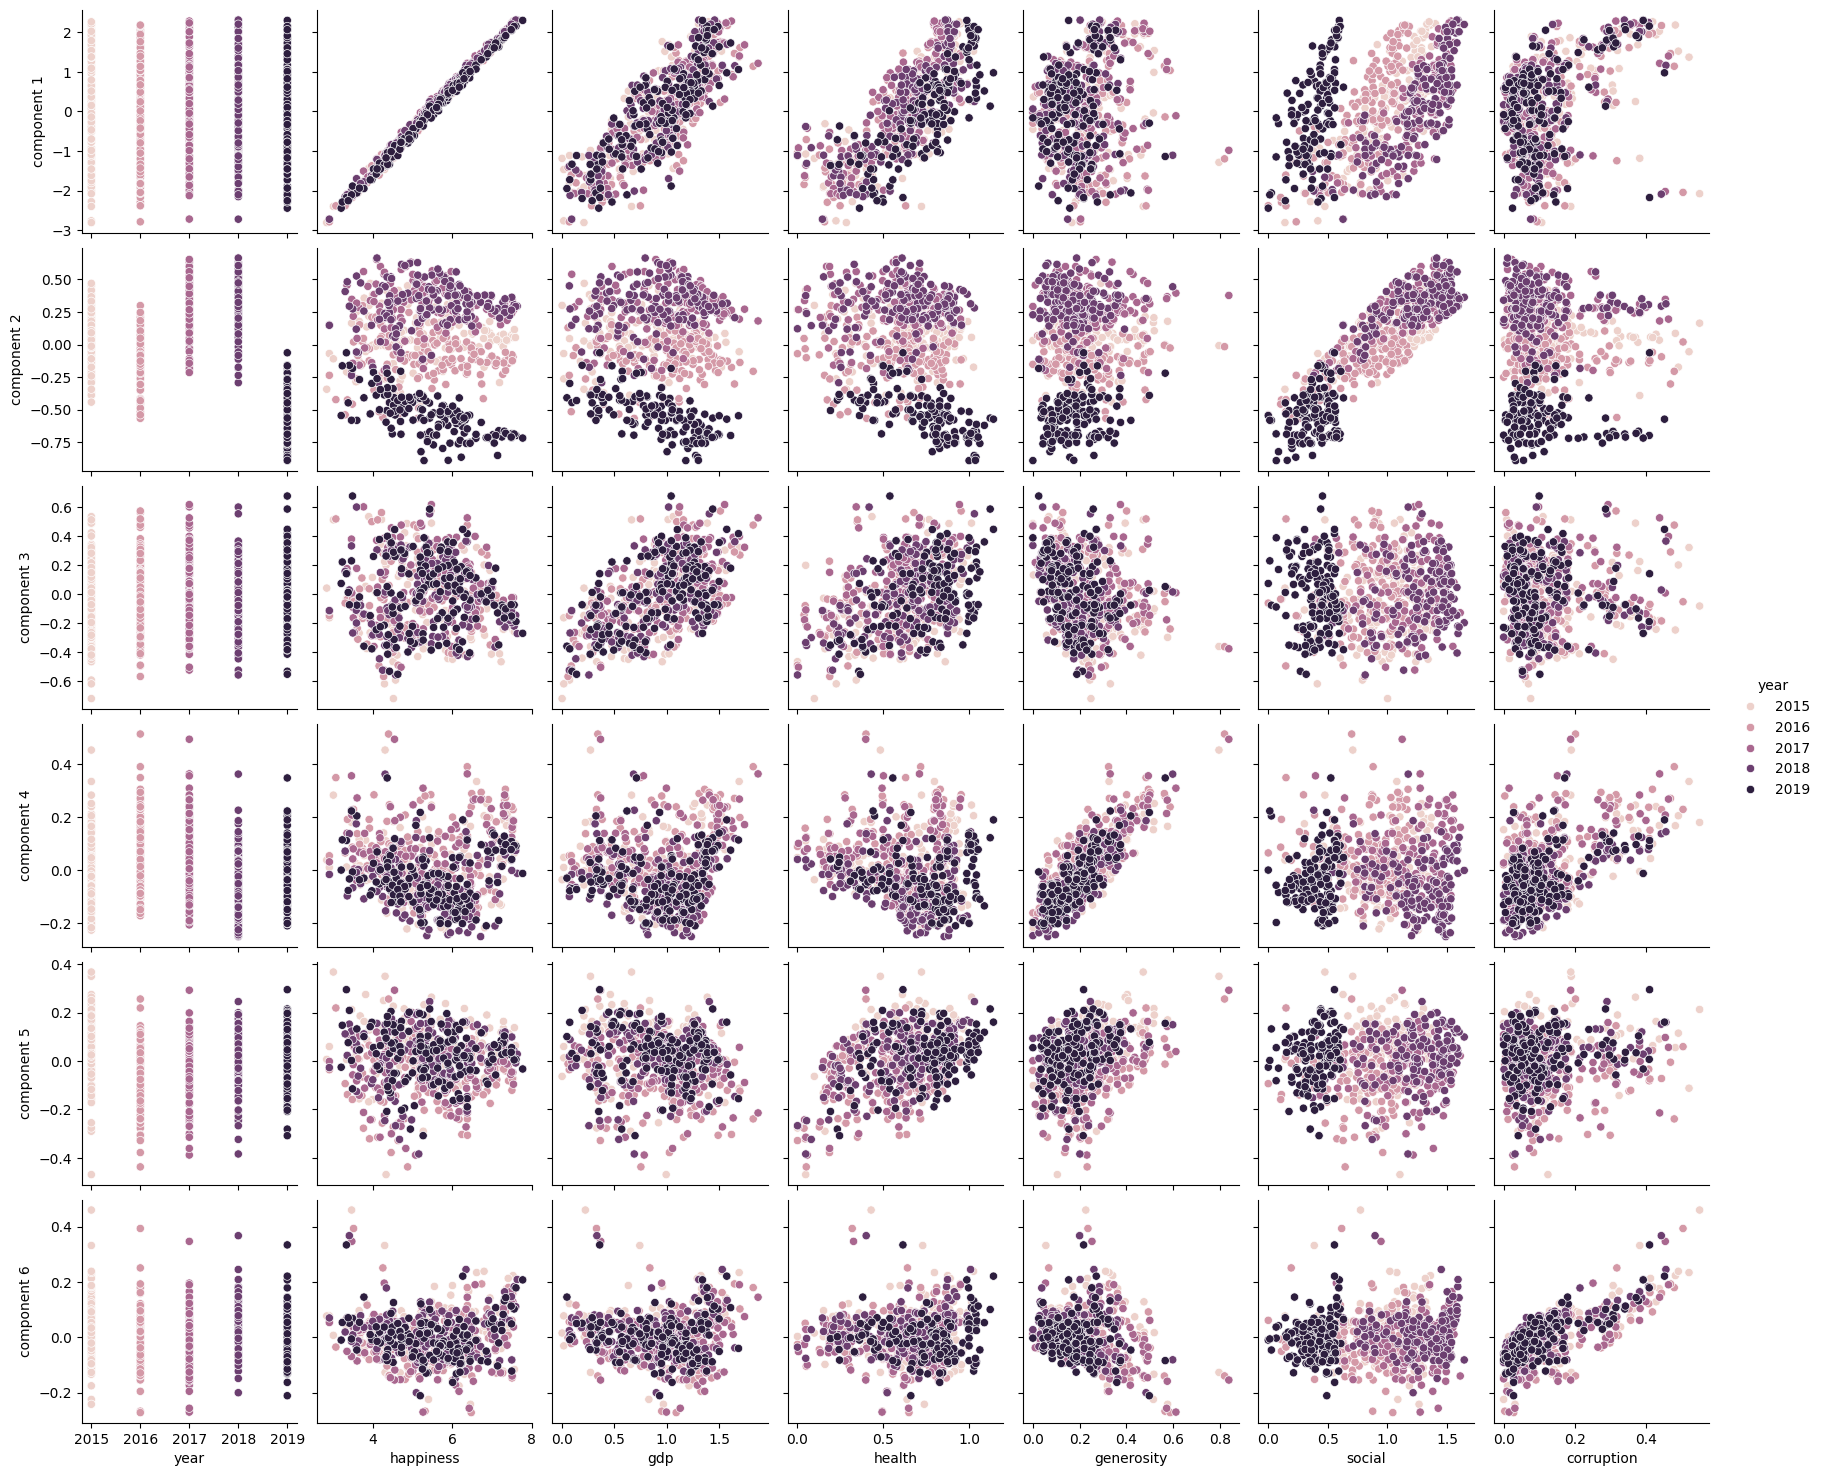

In [6]:
sns.pairplot(projected_data, hue='year', x_vars=quantitative_variables, y_vars=component_names);

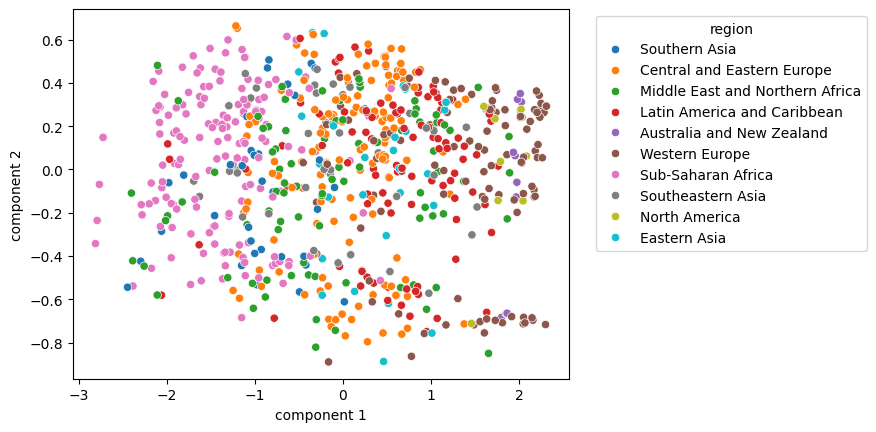

In [7]:
projected_data['region'] = df['region']
ax = sns.scatterplot(projected_data, x='component 1', y='component 2', hue='region')
ax.get_legend().set_bbox_to_anchor((1.04, 1))

## Q

Draw a scree plot to select a number of components.

Perform a PCA with the maximum likelihood estimator technique to automatically select the number of components.

## A

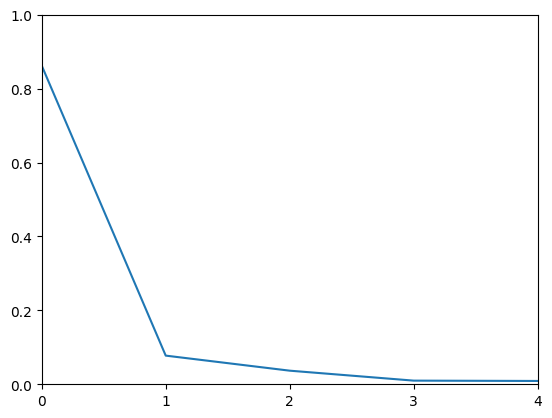

In [8]:
pca_ = PCA(n_components='mle').fit(df[independent_variables])
ax = sns.lineplot(pca_.explained_variance_ratio_)
ax.set_ylim([0, 1])
ax.set_xlim([0, pca_.n_components_ - 1])
ax.set_xticks(range(pca_.n_components_));

## Q

Each principal component can be thought of as a linear model of *happiness* as the independent variables. Let us consider the first principal component only.

Plot the corresponding residuals *vs* the “predicted values“. The points can be colored by region.

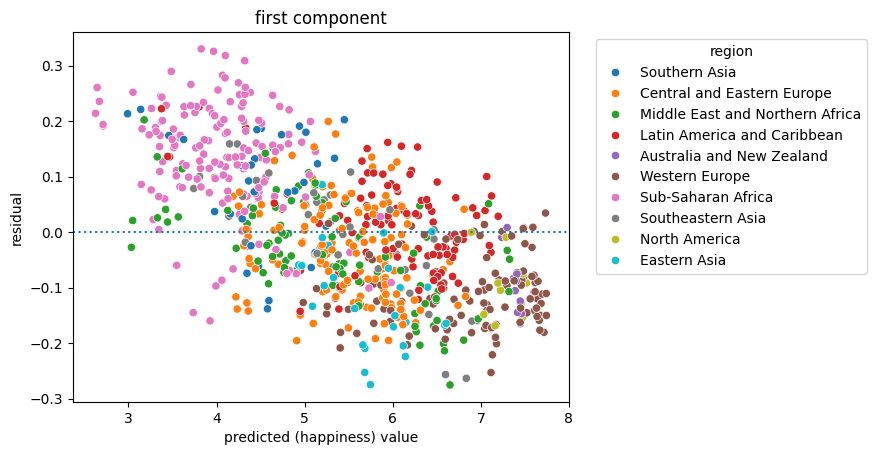

In [9]:
y_expected = df['happiness']
y_mean = y_expected.mean()

projected_data_ = pca_.transform(df[independent_variables])
data_on_first_component = projected_data_[:,0]
y_predicted = data_on_first_component + y_mean

residual = y_expected - y_predicted

df_for_plotting = df.copy()
df_for_plotting['predicted (happiness) value'] = y_predicted
df_for_plotting['residual'] = residual

ax = sns.scatterplot(df_for_plotting, x='predicted (happiness) value', y='residual', hue='region')
ax.set_title('first component')
ax.axhline(0, linestyle=':')
ax.get_legend().set_bbox_to_anchor((1.04, 1))

# UMAP

*umap-learn* is now listed in the *requirements.txt* file. Just in case:

In [ ]:
!"{sys.executable}" -m pip install --upgrade umap-learn

## Q

Carry out a 2D UMAP transform with whatever parameter values (*e.g.* 10 neighbors and unit minimum distance).

Plot the UMAP-projected points colored by region (in a first plot) and by score (in a second plot).

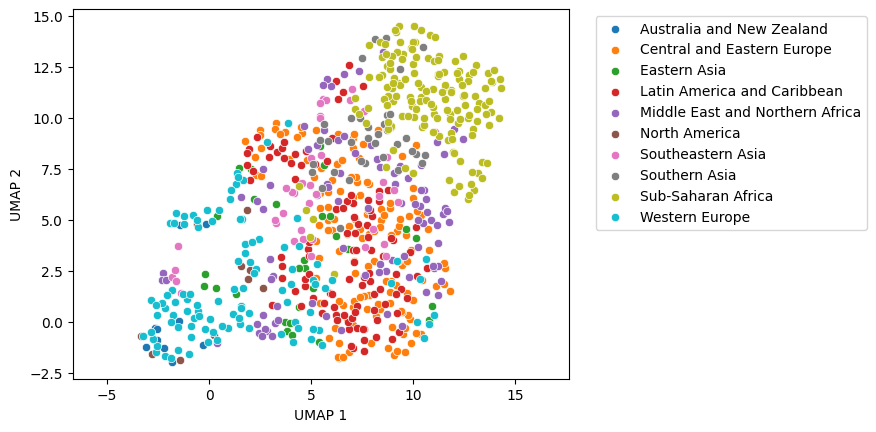

In [11]:
import umap

from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df[independent_variables])

umap_projected_data = umap.UMAP(
    n_neighbors=10,
    min_dist=1,
    random_state=354842, # for reproducibility
    n_jobs=1, # hides a warning message
).fit_transform(scaled_data)

# note: you can make a dataframe with a 'region' column instead;
#       the example below is a reminder that multiple Seaborn function
#       calls can be applied to a single figure
for region in np.unique(df['region']):
    region_data = umap_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim')
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

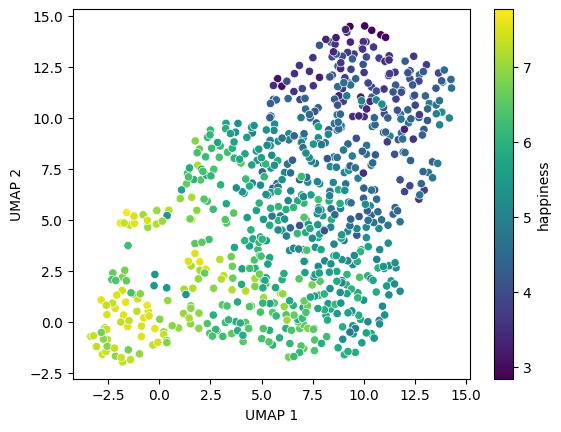

In [12]:
ax = sns.scatterplot(
    x=umap_projected_data[:, 0],
    y=umap_projected_data[:, 1],
    c=df['happiness'],
)
plt.colorbar(ax.get_children()[0], label='happiness')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

## Q

For illustration purpose, we may seek for the set of UMAP parameters that maximizes the separation between two groups.

This can be done by maximizing the Silhouette score:

In [13]:
from sklearn.metrics import silhouette_score

Let us try to highlight the European countries *vs* rest of the world (or Central/Eastern Europe *vs* Western Europe):

In [14]:
# indicator variables

# 1. Europe vs rest of the world
group1 = (df['region'] == 'Central and Eastern Europe') | (df['region'] == 'Western Europe')
group2 = ~group1

# 2. Central/Eastern Europe vs Western Europe
#group1 = df['region'] == 'Central and Eastern Europe'
#group2 = df['region'] == 'Western Europe'

# note: in practice we will pass only the points in group1 or group2;
#       the points that are not in either group will be excluded

indicator = np.zeros(df.shape[0]) # 0 will be the label for group1
indicator[group2] = 1 # 1 the label for group2
indicator = indicator[group1 | group2] # we discard the zeros that are not part of group1

def objective_function(projected_data):
    x = projected_data[group1 | group2, :]
    score = silhouette_score(x, indicator)
    return score

Find the combination of parameter values that maximizes the above score, using a grid search with neighbor counts 2, 3, 5, 10, 20, 30, 50, 100 and minimum distances 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, and plot the resulting UMAP (the projected data).

In [15]:
param_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100], 'min_dist': np.arange(.1, 1.1, .1)}
param_grid

{'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100],
 'min_dist': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

Hint: you can use simple *for* loops and lists to record the scores and associated parameters.

## A

Run the exhaustive grid search (takes time):

In [16]:
grid_n_neighbors = []
grid_min_dist = []
grid_scores = []

for n_neighbors in param_grid['n_neighbors']:
    for min_dist in param_grid['min_dist']:
        
        projected_data = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
        ).fit_transform(scaled_data)
        
        score = objective_function(projected_data)
        
        grid_n_neighbors.append(n_neighbors)
        grid_min_dist.append(min_dist)
        grid_scores.append(score)

# for result presentation only
grid_results = pd.DataFrame({'n_neighbors': grid_n_neighbors, 'min_dist': grid_min_dist, 'silhouette': grid_scores})
grid_results

,n_neighbors,min_dist,silhouette
0,2,0.1,0.047203
1,2,0.2,0.048862
2,2,0.3,0.024400
3,2,0.4,0.007879
4,2,0.5,0.004963
...,...,...,...
75,100,0.6,0.097644
76,100,0.7,0.099148
77,100,0.8,0.098830
78,100,0.9,0.100672


Retrieve the combination that performs best:

In [17]:
best = np.argmax(grid_scores)
best_n_neighbors = grid_n_neighbors[best]
best_min_dist = grid_min_dist[best]

print(f'n_neighbors: {best_n_neighbors}, min_dist: {best_min_dist}, score: {grid_scores[best]}')

n_neighbors: 5, min_dist: 0.1, score: 0.12336821109056473


Plot the projected data again:

In [18]:
new_projected_data = umap.UMAP(
    n_neighbors=best_n_neighbors,
    min_dist=best_min_dist,
).fit_transform(scaled_data)

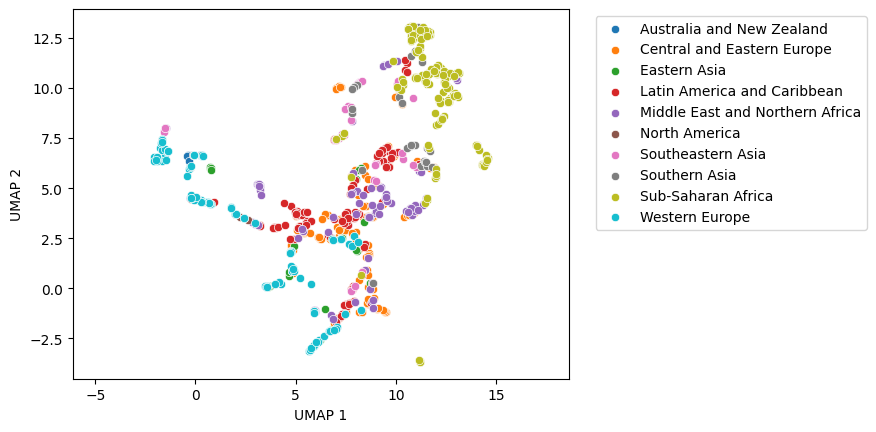

In [19]:
for region in np.unique(df['region']):
    region_data = new_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim')
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

# Agglomerative clustering

Let us copy-paste some plotting code from the scikit-learn official documentation:

In [20]:
from scipy.cluster.hierarchy import dendrogram

# copy-pasted from https://scikit-learn.org/1.7/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Example usage:
    # plot_dendogram(agglomerated_clustering, truncate_model="level", p=6)
    # See also scipy.cluster.hierarchy.dendrogram for more details

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    ax = plt.gca()
    ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")
    ax.set_yticks([])

    return ax

## Q

Perform agglomerative clustering:
- first without a defined number of clusters in order to plot a complex dendrogram (for example using the above function),
- second with 5 clusters to plot the data points colored by cluster (use 2D projected data, either the first 2 principal components or the UMAP components).

## A

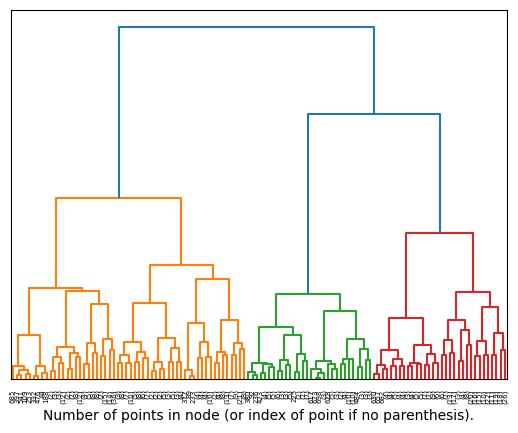

In [21]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_data)

plot_dendrogram(agglomerative_clustering, truncate_mode="level", p=6);

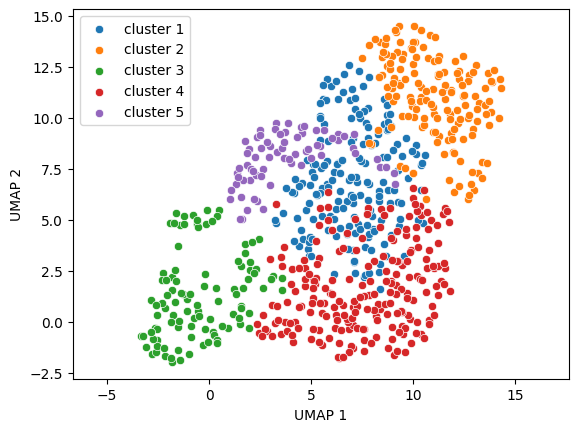

In [22]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=5).fit(scaled_data)

for cluster in range(agglomerative_clustering.n_clusters):
    cluster_data = umap_projected_data[agglomerative_clustering.labels_ == cluster, :]
    ax = sns.scatterplot(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        label=f'cluster {cluster+1}',
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

# *k*-means

## Q

Same as above, apply *k*-means and plot the clusters.

## A

In [23]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10).fit(scaled_data)

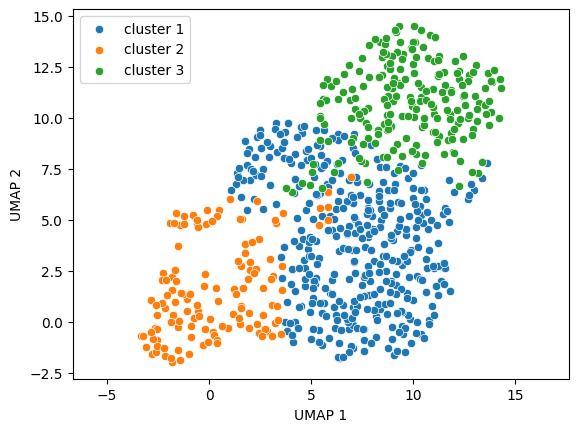

In [24]:
for cluster in range(k_means.n_clusters):
    cluster_data = umap_projected_data[k_means.labels_ == cluster, :]
    ax = sns.scatterplot(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        label=f'cluster {cluster+1}',
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');